# Basic Dataset Usage

This notebook is available in Google Colaboratory at https://colab.research.google.com/github/paranal-sw/parlogs-observations/blob/main/notebooks/01-basic-usage.ipynb

In [1]:
import os
import matplotlib.pyplot as plt
import pandas as pd

## Dataset configuration

The dataset is organized into Parket files follow a structured naming convention for easy identification and access based on the instrument, time range, and subsystems. This format ensures efficient data retrieval and manipulation.

```
{INSTRUMENT}-{TIME_RANGE}-{CONTENT}.parket
```


Where:
- `INSTRUMENT` can be PIONIER, GRAVITY, or MATISSE.
- `TIME_RANGE` is one of 1d, 1w, 1m, 6m.
- `CONTENT` can be meta, traces, traces-SUBSYSTEMS, or traces-TELESCOPES.

Example files:
- PIONIER-1w-meta.parket
- GRAVITY-1m-traces-SUBSYSTEMS.parket

The "meta" file includes information about the template execution, while "traces" files contain event logs.

In [2]:
# PIONIER MATISSE GRAVITY
INSTRUMENT='MATISSE'

# 1d 1w 1m 6m
RANGE='1w'


## Load dataset

### Hugginface Datasets
TBD

### Direct Download

In [3]:
from urllib.request import urlretrieve
REPO_URL='https://huggingface.co/datasets/Paranal/parlogs-observations/resolve/main/data'
PATH='sample_data' # Convenient name to be Colab compatible

!mkdir -p $PATH

# Comment what you actually need

fname = f'{INSTRUMENT}-{RANGE}-meta.parket'
if not os.path.exists(f'{PATH}/{fname}'):
    urlretrieve(f'{REPO_URL}/{fname}', f'{PATH}/{fname}')
df_meta=pd.read_parquet(f'{PATH}/{fname}')

fname = f'{INSTRUMENT}-{RANGE}-traces.parket'
if not os.path.exists(f'{PATH}/{fname}'):
    urlretrieve(f'{REPO_URL}/{fname}', f'{PATH}/{fname}')
df_inst=pd.read_parquet(f'{PATH}/{fname}')

fname = f'{INSTRUMENT}-{RANGE}-traces-SUBSYSTEMS.parket'
if not os.path.exists(f'{PATH}/{fname}'):
    urlretrieve(f'{REPO_URL}/{fname}', f'{PATH}/{fname}')
df_subs=pd.read_parquet(f'{PATH}/{fname}')

fname = f'{INSTRUMENT}-{RANGE}-traces-TELESCOPES.parket'
if not os.path.exists(f'{PATH}/{fname}'):
    urlretrieve(f'{REPO_URL}/{fname}', f'{PATH}/{fname}')
df_tele=pd.read_parquet(f'{PATH}/{fname}')

## Meta data

Each group of 1d, 1w, 1m, 6m contains metadata regarding its contents, which includes details about the instrument used, time range, and types of logs stored. The fields of the metadata are:

| Field     | Comment                                                  |
| --------- | -------------------------------------------------------- |
| START     | The start timestamp of the template execution in milliseconds |
| END       | The end timestamp of the template execution in milliseconds   |
| TIMEOUT   | Indicates if the execution exceeded a predefined time limit   |
| system    | The name of the system used (e.g., PIONIER)                    |
| procname  | The process name associated with the template execution       |
| TPL_ID    | The filename of the corresponding template file              |
| ERROR     | Indicates if there was an error during execution              |
| Aborted   | Indicates if the template execution was aborted (manually or because an error) |
| SECONDS   | The duration of the template execution in seconds             |
| TEL       | The class of telescope used in the observation, in this dataset it is only AT |

In [4]:
df_meta

,START,END,TIMEOUT,system,procname,TPL_ID,ERROR,Aborted,SECONDS,TEL
0,2019-04-02 01:29:45.681,2019-04-02 01:38:08.541,False,MATISSE,bob_ins,MATISSE_img_acq,False,False,502.0,AT
1,2019-04-02 01:38:08.559,2019-04-02 01:44:02.506,False,MATISSE,bob_ins,MATISSE_hyb_obs,False,False,353.0,AT
2,2019-04-02 01:45:44.711,2019-04-02 01:58:00.921,False,MATISSE,bob_ins,MATISSE_img_acq,False,False,736.0,AT
3,2019-04-02 01:58:19.863,2019-04-02 02:14:00.315,False,MATISSE,bob_ins,MATISSE_hyb_obs,False,False,940.0,AT
4,2019-04-02 06:36:28.631,2019-04-02 07:00:16.566,False,MATISSE,bob_ins,MATISSE_img_acq,False,False,1427.0,AT
...,...,...,...,...,...,...,...,...,...,...
215,2019-04-07 21:20:07.817,2019-04-07 21:22:12.808,False,MATISSE,bob_ins,MATISSE_gen_tec_opd,False,False,124.0,AT
216,2019-04-07 21:22:25.249,2019-04-07 21:34:42.495,False,MATISSE,bob_ins,MATISSE_gen_tec_check_fringes,False,False,737.0,AT
217,2019-04-07 21:34:42.495,2019-04-07 21:39:06.173,False,MATISSE,bob_ins,MATISSE_gen_cal_bias,False,False,263.0,AT
218,2019-04-07 21:40:15.747,2019-04-07 21:42:02.235,False,MATISSE,bob_ins,MATISSE_gen_cal_bias,False,False,106.0,AT


In [5]:
df_meta.describe(include='all')

,START,END,TIMEOUT,system,procname,TPL_ID,ERROR,Aborted,SECONDS,TEL
count,220,220,220,220,220,220,220,220,220.000000,220
unique,NaN,NaN,1,1,9,16,2,2,NaN,1
top,NaN,NaN,False,MATISSE,bob_ins,MATISSE_img_acq,False,False,NaN,AT
freq,NaN,NaN,220,220,152,43,214,201,NaN,220
mean,2019-04-04 20:51:56.300281856,2019-04-04 20:59:59.311022592,NaN,NaN,NaN,NaN,NaN,NaN,482.559091,NaN
min,2019-04-02 01:29:45.681000,2019-04-02 01:38:08.541000,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN
25%,2019-04-03 12:53:59.687249920,2019-04-03 12:57:10.049500160,NaN,NaN,NaN,NaN,NaN,NaN,117.000000,NaN
50%,2019-04-04 17:52:37.799000064,2019-04-04 17:56:41.476500224,NaN,NaN,NaN,NaN,NaN,NaN,247.000000,NaN
75%,2019-04-06 04:18:54.326000128,2019-04-06 04:27:43.384000,NaN,NaN,NaN,NaN,NaN,NaN,617.500000,NaN
max,2019-04-07 21:42:20.993000,2019-04-07 21:44:06.241000,NaN,NaN,NaN,NaN,NaN,NaN,2310.000000,NaN


## Traces

The dataset contains structured logs from software operations related to astronomical instruments. Each entry in the log provides detailed information regarding specific actions or events recorded by the system. Below is the description of each field in the log entries:

| Field       | Description                                                                                       |
|-------------|---------------------------------------------------------------------------------------------------|
| @timestamp  | The timestamp of the log entry in milliseconds.                                                   |
| system      | The name of the system (e.g., PIONIER) from which the log entry originates.                       |
| hostname    | The hostname of the machine where the log entry was generated.                                    |
| loghost     | The host of the logging system that generated the entry.                                          |
| logtype     | Type of the log entry (e.g., LOG, FEVT, ERR), indicating its nature such as general log, event, or error. |
| envname     | The environment name where the log was generated, providing context for the log entry.            |
| procname    | The name of the process that generated the log entry.                                             |
| procid      | The process ID associated with the log entry.                                                     |
| module      | The module from which the log entry originated, indicating the specific part of the system.      |
| keywname    | Name of any keyword associated with the log entry, if applicable. It is always paired with keywvalue |
| keywvalue   | Value of the keyword mentioned in `keywname`, if applicable.                                      |
| keywmask    | Mask or additional context for the keyword, if applicable.                                        |
| logtext     | The actual text of the log entry, providing detailed information about the event or action.      |
| trace_id    | A unique identifier associated with each log entry, corresponds to id in metadata table.  |


In [6]:
df_inst

,@timestamp,system,hostname,loghost,logtype,envname,procname,procid,module,keywname,keywvalue,keywmask,logtext,trace_id
0,2019-04-02 01:29:45.681,MATISSE,wmt,wmt,LOG,wmt,bob_ins,21,seq,,,,Started at 2019-04-02T01:29:45 (underlined),0
1,2019-04-02 01:29:45.681,MATISSE,wmt,wmt,LOG,wmt,bob_ins,21,seq,,,,MATISSE_img_acq -- Celestial target acquisitio...,0
2,2019-04-02 01:29:45.945,MATISSE,wmt,wmt,LOG,wmt,bob_ins,21,seq,,,,DET1 INTERFY VAL = '512',0
3,2019-04-02 01:29:45.945,MATISSE,wmt,wmt,LOG,wmt,bob_ins,21,seq,,,,DET1 INTERFX VAL = '512',0
4,2019-04-02 01:29:45.945,MATISSE,wmt,wmt,LOG,wmt,bob_ins,21,seq,,,,COU AG EQUINOX = '2000.0',0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192840,2019-04-07 21:44:06.231,MATISSE,wmt,wmt,LOG,wmt,bob_ins,19,seq,,,,-1 (SpringGreen4),219
192841,2019-04-07 21:44:06.231,MATISSE,wmt,wmt,LOG,wmt,mtoControl,228,boss,,,,SETUP command done.,219
192842,2019-04-07 21:44:06.232,MATISSE,wmt,wmt,LOG,wmt,bob_ins,19,seq,,,,Template MATISSE_gen_cal_bias finished.,219
192843,2019-04-07 21:44:06.239,MATISSE,wmt,wmt,LOG,wmt,bob_ins,19,seq,,,,Finished in 106 seconds at 2019-04-07T21:44:06...,219


In [7]:
df_inst.describe(include='all')

,@timestamp,system,hostname,loghost,logtype,envname,procname,procid,module,keywname,keywvalue,keywmask,logtext,trace_id
count,192845,192845,192845,192845,192845,192845,192845,192845.000000,192845,192845,192845,192845,192845,192845.000000
unique,NaN,1,1,1,4,7,784,NaN,30,100,1,5,47796,NaN
top,NaN,MATISSE,wmt,wmt,LOG,wmt,mtoControl,NaN,seq,,,,Executing SETUP command ...,NaN
freq,NaN,192845,192845,192845,177467,185582,74470,NaN,81239,186339,192845,177712,11393,NaN
mean,2019-04-05 05:34:51.635441920,NaN,NaN,NaN,NaN,NaN,NaN,137.739542,NaN,NaN,NaN,NaN,NaN,123.111214
min,2019-04-02 01:29:45.681000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,0.000000
25%,2019-04-03 13:43:55.760999936,NaN,NaN,NaN,NaN,NaN,NaN,36.000000,NaN,NaN,NaN,NaN,NaN,59.000000
50%,2019-04-06 00:55:25.865999872,NaN,NaN,NaN,NaN,NaN,NaN,149.000000,NaN,NaN,NaN,NaN,NaN,150.000000
75%,2019-04-06 05:53:09.647000064,NaN,NaN,NaN,NaN,NaN,NaN,228.000000,NaN,NaN,NaN,NaN,NaN,169.000000
max,2019-04-07 21:44:06.241000,NaN,NaN,NaN,NaN,NaN,NaN,250.000000,NaN,NaN,NaN,NaN,NaN,219.000000


## Examples

### Dataset Statistics

In [8]:
print(f'INSTRUMENT  : {INSTRUMENT}')
print(f'Period      : {RANGE}')
print(f'From        : {df_meta["START"].min()}')
print(f'To          : {df_meta["END"].max()}')
print(f'# executions: {len(df_meta)}')
print()
print(f'Total Instrument events: {len(df_inst)}')
print(f'Total Subsytem events  : {len(df_subs)}')
print(f'Total Telescope events : {len(df_tele)}')

INSTRUMENT  : MATISSE
Period      : 1w
From        : 2019-04-02 01:29:45.681000
To          : 2019-04-07 21:44:06.241000
# executions: 220

Total Instrument events: 192845
Total Subsytem events  : 179721
Total Telescope events : 516938


### Count TPL_ID executions

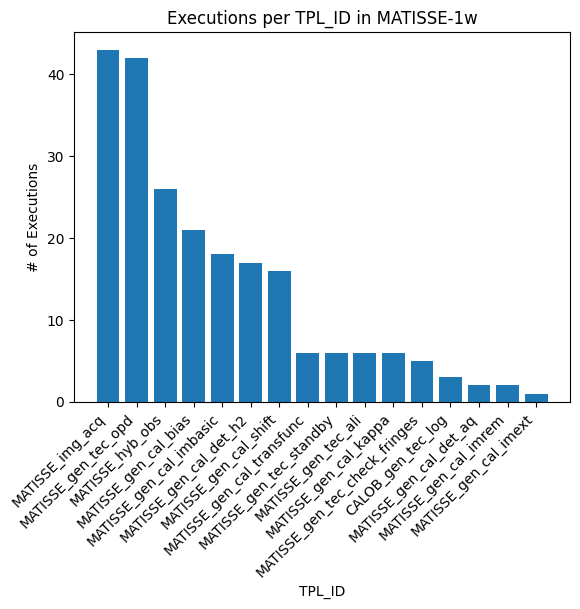

In [9]:
executions_per_tpl = df_meta['TPL_ID'].value_counts()

plt.bar(executions_per_tpl.index, executions_per_tpl.values)
plt.xlabel("TPL_ID")
plt.ylabel("# of Executions")
plt.title(f"Executions per TPL_ID in {INSTRUMENT}-{RANGE}")
# Rotate x-axis labels to 45 degrees
plt.xticks(rotation=45, ha='right')  # ha='right' aligns labels to right
plt.show()


### Failed Executions

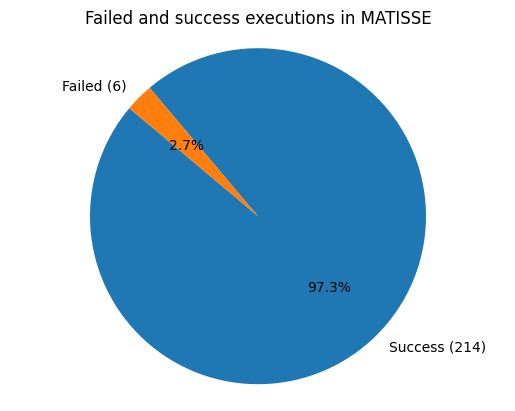

In [10]:
outcome = df_meta[['ERROR']].value_counts()

labels = [f'Success ({outcome[False]})', f'Failed ({outcome[True]})']

plt.pie(outcome, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title(f"Failed and success executions in {INSTRUMENT}")
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()